In [3]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

<h2>models progress</h2>

In [30]:
models_progress = {"logistic_regression" : [12.1 , 7.8] , "KNN" : [10.8 , 8] , "ANN" : [11.3 , 7.8]}
mp = pd.DataFrame(models_progress , index=['raw' , 'normalized'])

In [31]:
mp

,logistic_regression,KNN,ANN
raw,12.1,10.8,11.3
normalized,7.8,8.0,7.8


In [34]:
mp_reset = mp.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="accuracy_progress"
)
mp_reset.rename(columns={"index": "data_type"} , inplace=True)

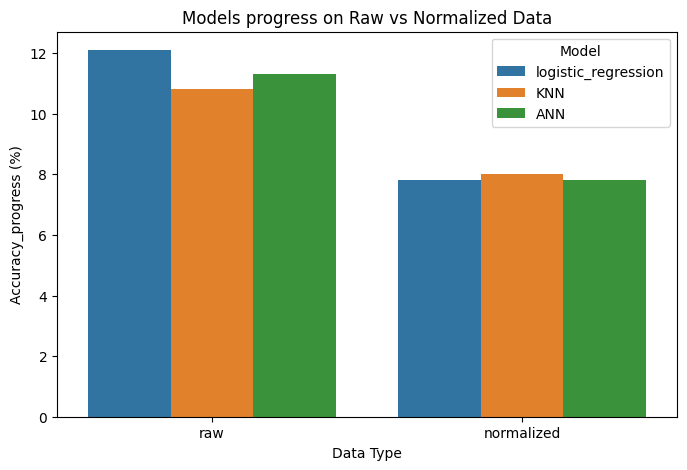

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mp_reset, x="data_type", y="accuracy_progress", hue="model")
 
plt.title("Models progress on Raw vs Normalized Data")
plt.ylabel("Accuracy_progress (%)")
plt.xlabel("Data Type")
plt.legend(title="Model")
# plt.grid(axis="y", linestyle="--", alpha=0.6)



plt.savefig("../reports/figures/models_progress.png", dpi=300)

plt.show()

<h2>Models score</h2>

In [36]:
models_score = {"logistic_regression" : [82.9 , 98.4 ,90] , "KNN" : [76.5 , 96.9, 85.5] , "ANN" : [82.9 , 98.4 ,90]}

mc = pd.DataFrame(models_score , index=['precision' , 'recall' , 'f1'])

In [37]:
mc

,logistic_regression,KNN,ANN
precision,82.9,76.5,82.9
recall,98.4,96.9,98.4
f1,90.0,85.5,90.0


In [38]:
mc_reset = mc.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="score_value"
)
mc_reset.rename(columns={"index": "score_type"} , inplace=True)

In [39]:
mc_reset

,score_type,model,score_value
0,precision,logistic_regression,82.9
1,recall,logistic_regression,98.4
2,f1,logistic_regression,90.0
3,precision,KNN,76.5
4,recall,KNN,96.9
5,f1,KNN,85.5
6,precision,ANN,82.9
7,recall,ANN,98.4
8,f1,ANN,90.0


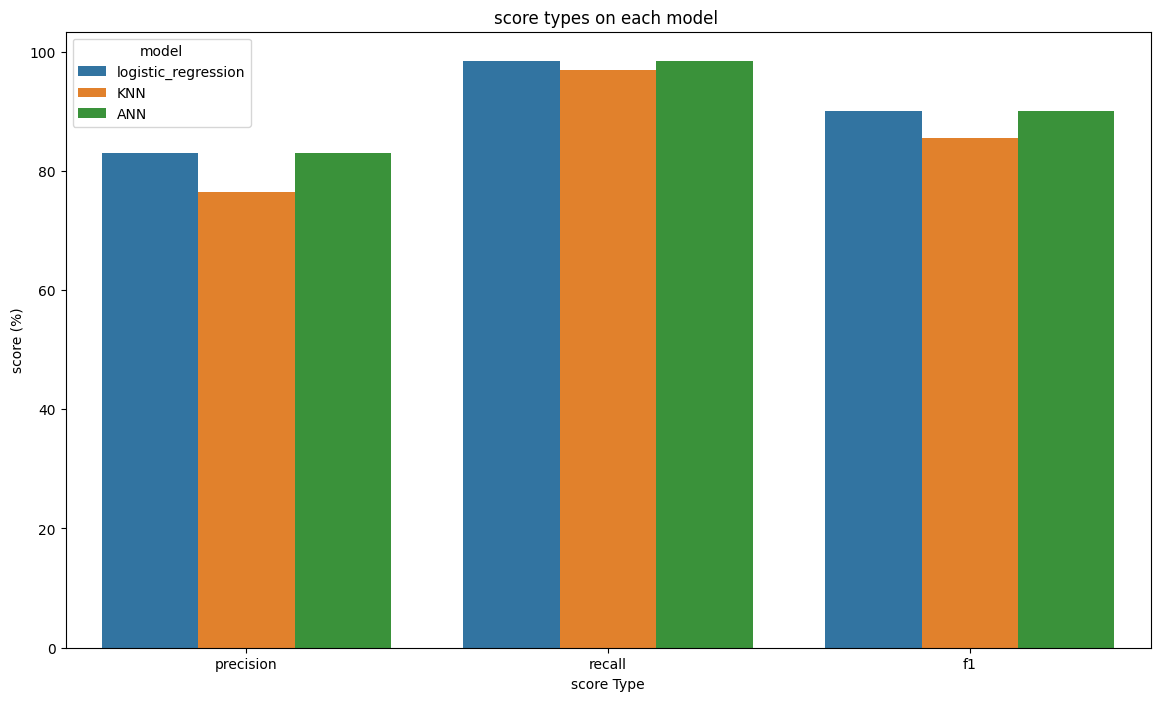

In [60]:
plt.figure(figsize=(14, 8))
sns.barplot(data=mc_reset, x="score_type", y="score_value", hue="model")
 
plt.title("score types on each model ")
plt.ylabel("score (%)")
plt.xlabel("score Type")
plt.legend(title="model")
# plt.grid(axis="y", linestyle="--", alpha=0.6)


plt.savefig("../reports/figures/score types on each model", dpi=300)


plt.show()

## False Positive Error

In [42]:
models_FP = {"logistic_regression" : [13.98 , 13.98] , "KNN" : [29.3 , 20.43] , "ANN" : [30.11 , 13.98]}
MFP = pd.DataFrame(models_FP , index=['raw' , 'normalized'])

In [43]:
MFP

,logistic_regression,KNN,ANN
raw,13.98,29.30,30.11
normalized,13.98,20.43,13.98


In [53]:
MFP_reset = MFP.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="False Positive"
)
MFP_reset.rename(columns={"index": "data_type"} , inplace=True) 

In [54]:
MFP_reset

,data_type,model,False Positive
0,raw,logistic_regression,13.98
1,normalized,logistic_regression,13.98
2,raw,KNN,29.30
3,normalized,KNN,20.43
4,raw,ANN,30.11
5,normalized,ANN,13.98


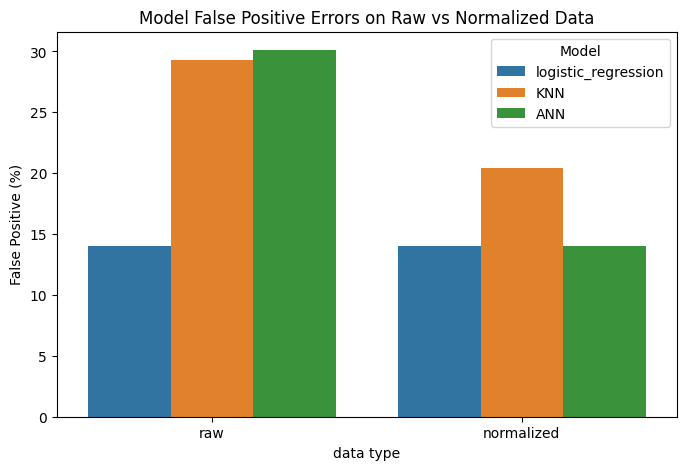

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(data=MFP_reset, x="data_type", y="False Positive", hue="model")
 
plt.title("Model False Positive Errors on Raw vs Normalized Data")
plt.ylabel("False Positive (%)")
plt.xlabel("data type")
plt.legend(title="Model")

plt.savefig("../reports/figures/False_Positive_Errors.png", dpi=300)
# plt.grid(axis="y", linestyle="--", alpha=0.6)

<h2>best Model</h2>

<h3>grid_search_logistic_regression</h3>